In [1]:
# Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:01<00:00, 5.07MB/s]


In [3]:
# Open the website and delay the loading 
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [4]:
# Set up the HTML parser
html = browser.html
soup = soup(html, 'html.parser')

In [12]:
# Scrape the data in the HTML table, using either Pandas's read_html method or manually with Splinter and Beautiful Soup
mars_df = pd.read_html(url)[0]
mars_df.sample(10)
# table_contents = soup.find('table', class_='table')
# print(table_contents.text)
# table_contents = soup.find_all('table')[0]
# print(table_contents.text)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
489,512,2014-03-13,569,101,4,-85.0,825.0
1827,1859,2018-01-18,1938,116,4,-78.0,762.0
467,488,2014-02-19,547,91,4,-85.0,853.0
1793,1822,2017-12-14,1904,100,4,-79.0,801.0
487,510,2014-03-11,567,100,4,-86.0,827.0
186,120,2013-03-27,227,289,10,-70.0,892.0
338,355,2013-09-13,393,21,1,-76.0,877.0
1371,1397,2016-10-01,1477,233,8,-72.0,888.0
1845,1879,2018-02-05,1956,125,5,-79.0,744.0
868,895,2015-04-20,961,328,11,-71.0,849.0


In [20]:
# Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website:
# The id heading: The identification number of a single transmission from the Curiosity rover.
# The terrestrial_date heading: The date on Earth.
# The sol heading: The number of elapsed sols (Martian days) since Curiosity landed on Mars.
# The ls heading: The solar longitude.
# The month heading: The Martian month.
# The min_temp heading: The minimum temperature, in Celsius, of a single Martian day (sol).
# The pressure heading: The atmospheric pressure at Curiosity's location.
mars_table = pd.DataFrame(mars_df, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_table.sample(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1212,1238,2016-04-12,1309,135,5,-81.0,747.0
505,527,2014-03-30,585,109,4,-83.0,802.0
340,357,2013-09-15,395,22,1,-77.0,878.0
804,828,2015-02-08,892,287,10,-71.0,892.0
207,143,2013-04-17,248,302,11,-70.0,877.0
832,856,2015-03-09,920,304,11,-72.0,868.0
286,299,2013-07-14,333,350,12,-75.0,849.0
980,1006,2015-08-15,1075,27,1,-77.0,879.0
459,476,2014-02-10,539,87,3,-85.0,864.0
1605,1634,2017-06-03,1715,13,1,-77.0,851.0


In [24]:
# Examine the data types of all the DataFrame columns.
mars_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [25]:
# If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types
mars_table['terrestrial_date'] = pd.to_datetime(mars_table['terrestrial_date'])
mars_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [27]:
# How many months exist on Mars
months = mars_table['month'].nunique()
print(months, f'months on Mars')

12 months on Mars


In [28]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_days = mars_table['sol'].nunique()
print(martian_days, f'Martian days of data')

1867 Martian days of data


In [48]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum 
# daily temperature of all the months. 
cold_temp = mars_table.groupby('month').mean().sort_values('min_temp')
cold_temp
# The month that has the lowest average temperature is month 3, while month 8 has the highest average temperature 

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
6,735.306122,750.829932,164.897959,-75.299320,745.054422
12,931.602410,990.951807,344.692771,-74.451807,842.156627
7,714.549296,715.105634,194.894366,-72.281690,795.105634
11,874.246377,947.224638,314.536232,-71.985507,857.014493


Text(0.5, 1.0, 'Monthly Minimum Temperature on Mars')

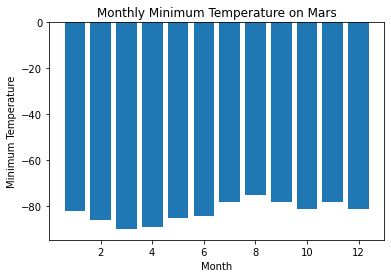

In [49]:
# Plot the results as a bar chart
mars_temps = mars_table[['month', 'min_temp']].copy()
plt.bar(mars_temps['month'], mars_temps['min_temp'])
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')
plt.title('Monthly Minimum Temperature on Mars')

In [40]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric 
# pressure of all the months.
low_pressure = mars_table.groupby('month').mean().sort_values('pressure')
low_pressure
# The months with the lowest and highest atm. pressure are months 6 and 9, respectively

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.299320,745.054422
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
7,714.549296,715.105634,194.894366,-72.281690,795.105634
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
12,931.602410,990.951807,344.692771,-74.451807,842.156627
11,874.246377,947.224638,314.536232,-71.985507,857.014493
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
8,718.078014,795.333333,224.347518,-68.382979,873.829787
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917


Text(0.5, 1.0, 'Monthly Atmospheric Pressure on Mars')

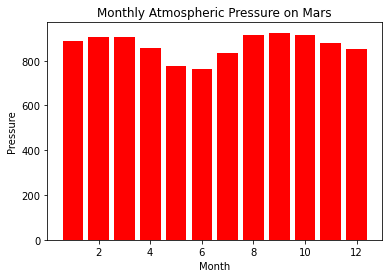

In [57]:
# Plot the results as a bar chart
mars_pressure = mars_table[['month', 'pressure']].copy()
plt.bar(mars_pressure['month'], mars_pressure['pressure'], color='red')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title('Monthly Atmospheric Pressure on Mars')

In [63]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how 
# many days elapse on Earth? 
earth_days = ((mars_table['terrestrial_date'].max())-(mars_table['terrestrial_date'].min()))
earth_days

Timedelta('2021 days 00:00:00')

Text(0.5, 1.0, 'Temperature by Terrestrial Date')

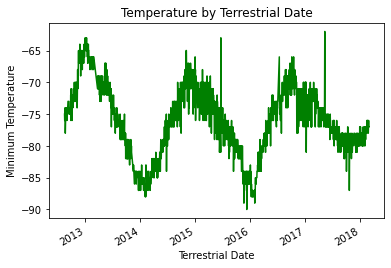

In [62]:
# Visually estimate the result by plotting the daily minimum temperature
mars_year = mars_table.groupby('terrestrial_date')['min_temp'].mean()
mars_year.plot.line(x='terrestrial_date', y='min-temp', color='green')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature')
plt.title('Temperature by Terrestrial Date')

In [64]:
# Export the DataFrame to a CSV file
output_csv = 'mars_data.csv'
mars_table.to_csv(output_csv, header=True, index=False)